-18


TypeError: Cannot cast ufunc add output from dtype('int16') to dtype('uint8') with casting rule 'same_kind'

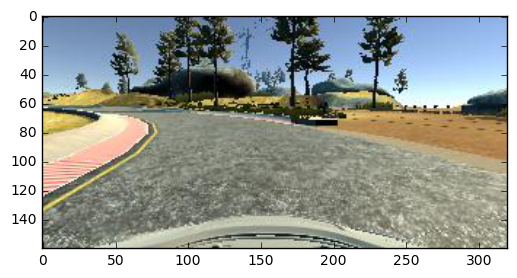

In [22]:
import pandas as pd
import numpy as np
from PIL import Image
import pickle
import csv
import os
import cv2
import sklearn
import random
import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/Christy/Desktop/'
samples = []
images = []
angles = []
with open('driving_log.csv','r') as log_1, open(path+'driving_log.csv','r') as log_2:
  reader_1 = csv.reader(log_1)
  reader_2 = csv.reader(log_2)
  next(reader_1, None)
  for line in reader_2:
    samples.append(line)
    if 'center_2017_02_22_01_28_55_524' in line[0]:
        rand = random.randint(-50,50)
        print(rand)
        center_image =cv2.cvtColor(cv2.imread(line[0]),cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(center_image)
        center_image = cv2.cvtColor(center_image,cv2.COLOR_RGB2HSV)
        #change_pct = random.uniform(0.4, 1.2)
        center_image[:,:,2] += rand
        #center_image[:,:,2] = center_image[:,:,2] * change_pct
        center_image = cv2.cvtColor(center_image,cv2.COLOR_HSV2RGB)
        '''
        left_image = cv2.cvtColor(cv2.imread(line[1].strip()),cv2.COLOR_BGR2HSV)
        left_image[:,:,2] += rand
        left_image = cv2.cvtColor(left_image,cv2.COLOR_HSV2RGB)
        right_image = cv2.cvtColor(cv2.imread(line[2].strip()),cv2.COLOR_BGR2HSV)
        right_image[:,:,2] += rand
        right_image = cv2.cvtColor(right_image,cv2.COLOR_HSV2RGB)
        '''
        plt.figure()
        plt.imshow(center_image)

        center_angle = float(line[3])
        correction = 0.2
        steering_left = center_angle + correction
        steering_right = center_angle - correction
        images.extend([center_image, left_image, right_image])
        angles.append([center_angle, steering_left, steering_right])